<a href="https://colab.research.google.com/github/kozen88/HCV_DM23/blob/main/Apprendimento_classificatore_Bayesiano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Addestramento di un classificatrore Bayesiano

In questo notebook andremo ad addestrare un o più classificatori Bayesiani cercando di effettuari quanti più esperimenti possibili per creare una baseline del problema che stiamo affrontando e cercare di tirare fuori un modello capace di battere il nostro attuale lower bound rappresentato dallo stimatore moda.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sb
sb.set()


In [ ]:
df = pd.read_csv('HCV-Egy-Data.csv', delimiter=',')
print(df)

In [ ]:
df_reduced = pd.read_csv('pca_reduced_df_uncleaned.csv', delimiter=',')
print(df_reduced)

Primo esperimento addestramento Gaussian Naive Bayes su il dataframe di partenza uncleaned con approccio classico con una cross-validation a 10 folds.

In [15]:
# inizio dell'addestramento con Gaussina Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

# preparazione del data set diviso infeature e target
X = df.drop('Baselinehistological staging', axis=1)
y = df['Baselinehistological staging']

# istanziazione del modello Gaussian Naive Bayes
model_GB = GaussianNB()

# usiamo la cross-val
scores = cross_val_score(model_GB, X, y, cv=10)
mean_accurancy = scores.mean()
print("Accurancy su ogni ciclo della cross-validation:", scores)
print("Accurancy mediata su i 10 fold fatti:", mean_accurancy)


Accurancy su ogni ciclo della cross-validation: [0.25179856 0.21582734 0.26618705 0.24460432 0.27338129 0.23188406
 0.20289855 0.29710145 0.23188406 0.25362319]
Accurancy mediata su i 10 fold fatti: 0.24691898654989056


In [16]:
# creiamo questa funzione di addestramento per automatizzare i nostri esperimenti
def evaluate_classifiers(cv_values, classifiers, X, y):
    for classifier in classifiers:
        print("Classifier:", classifier)
        for cv in cv_values:
            model = classifier()
            scores = cross_val_score(model, X, y, cv=cv)
            mean_accuracy = scores.mean()
            print("CV:", cv)
            print("Mean Accuracy:", mean_accuracy)
            print("Scores:", scores)
            print("----------")


In [20]:
values = [5, 10, 15, 20]
classifier_model = [GaussianNB]

evaluate_classifiers(values, classifier_model, X, y)

Classifier: <class 'sklearn.naive_bayes.GaussianNB'>
CV: 5
Mean Accuracy: 0.23826714801444043
Scores: [0.22743682 0.2599278  0.20216606 0.24548736 0.25631769]
----------
CV: 10
Mean Accuracy: 0.24691898654989056
Scores: [0.25179856 0.21582734 0.26618705 0.24460432 0.27338129 0.23188406
 0.20289855 0.29710145 0.23188406 0.25362319]
----------
CV: 15
Mean Accuracy: 0.24475611656537324
Scores: [0.2688172  0.19354839 0.27956989 0.27956989 0.21505376 0.26086957
 0.29347826 0.22826087 0.18478261 0.15217391 0.32608696 0.22826087
 0.23913043 0.27173913 0.25      ]
----------
CV: 20
Mean Accuracy: 0.24333333333333335
Scores: [0.24285714 0.24285714 0.21428571 0.22857143 0.27142857 0.26086957
 0.2173913  0.27536232 0.30434783 0.20289855 0.24637681 0.1884058
 0.17391304 0.24637681 0.36231884 0.24637681 0.14492754 0.28985507
 0.27536232 0.23188406]
----------


In [42]:
def evaluate_classifiers_with_plot(cv_values, classifiers, X, y):
    for classifier in classifiers:
        print("Classifier:", classifier)
        mean_accuracies_list = []
        for cv in cv_values:
            model = classifier()
            scores = cross_val_score(model, X, y, cv=cv)
            mean_accuracy = scores.mean()
            mean_accuracies_list.append(mean_accuracy)
            print("CV:", cv)
            print("Mean Accuracy:", mean_accuracy)
            print("Scores:", scores)
            print("----------")

        # Plotting the mean accuracies
        cv_range = np.array(cv_values)
        plt.plot(cv_range, mean_accuracies_list)
        plt.xticks(np.arange(0, max(cv_range) + 1, 5))
        plt.xlabel('Number of folds (cv)')
        plt.ylabel('Mean Accuracy')
        plt.title('Cross-Validation Mean Accuracy')
        plt.show()

Proviamo a generare dei plot sul comportamente del parametro scelto per effettuare i fold della cross-validation e andiamo ad eseguire una serie di prove per capire quale sia il miglior k.

In [ ]:
# con questo codice andiamo a cercare di ottimizzare la cross-validation
list_cv = range(2,31) # questo esperimento è stato condotto con 30, 100, 300 fold che sono stati documentati
evaluate_classifiers_with_plot(list_cv, classifier_model, X, y)

Gli esperimenti condotti purtoppo si dichiarano ad oggi un fallimento sull'addestramento, di seguito proveremo a ripetere gli stessi passi di addestramento fatti precedentemente, ma sul dataset ridotto di dimensionalità con la tecnica della PCA usata anche negli esperimenti condotti sul decision tree.

In [34]:
# preparazione degli attributi che faranno da predittori e del target
X_pca = df_reduced.drop('Baselinehistological staging', axis=1)
y_pca = df_reduced['Baselinehistological staging']

# istanziazione del modello Gaussian Naive Bayes
model_GB2 = GaussianNB()

# usiamo la cross-val
scores2 = cross_val_score(model_GB2, X_pca, y_pca, cv=10)
mean_accurancy2 = scores2.mean()
print("Accurancy su ogni ciclo della cross-validation:", scores2)
print("Accurancy mediata su i 10 fold fatti:", mean_accurancy2)

Accurancy su ogni ciclo della cross-validation: [0.21582734 0.17985612 0.23741007 0.25179856 0.23741007 0.26811594
 0.16666667 0.36231884 0.25362319 0.26086957]
Accurancy mediata su i 10 fold fatti: 0.24338963611719316


Anche in questo caso i risultati non lasciano sperare in bene ma procediamo nella verifica

In [35]:
# primo tentativo con i classici valori di cross-val utilizzati in letteratura
values2 = [5, 10, 15, 20]
classifier_model2 = [GaussianNB]

evaluate_classifiers(values2, classifier_model2, X_pca, y_pca)

Classifier: <class 'sklearn.naive_bayes.GaussianNB'>
CV: 5
Mean Accuracy: 0.23826714801444043
Scores: [0.18411552 0.24187726 0.24548736 0.25270758 0.26714801]
----------
CV: 10
Mean Accuracy: 0.24338963611719316
Scores: [0.21582734 0.17985612 0.23741007 0.25179856 0.23741007 0.26811594
 0.16666667 0.36231884 0.25362319 0.26086957]
----------
CV: 15
Mean Accuracy: 0.23622409225494778
Scores: [0.21505376 0.17204301 0.16129032 0.2688172  0.19354839 0.2826087
 0.2173913  0.2826087  0.23913043 0.13043478 0.31521739 0.31521739
 0.2173913  0.25       0.2826087 ]
----------
CV: 20
Mean Accuracy: 0.2383022774327122
Scores: [0.21428571 0.25714286 0.2        0.21428571 0.25714286 0.24637681
 0.1884058  0.27536232 0.24637681 0.2173913  0.23188406 0.23188406
 0.14492754 0.24637681 0.4057971  0.31884058 0.15942029 0.17391304
 0.23188406 0.30434783]
----------


Classifier: <class 'sklearn.naive_bayes.GaussianNB'>
CV: 2
Mean Accuracy: 0.2469357071958228
Scores: [0.24098124 0.25289017]
----------
CV: 3
Mean Accuracy: 0.23468023901863377
Scores: [0.2034632  0.23376623 0.26681128]
----------
CV: 4
Mean Accuracy: 0.23902025620096282
Scores: [0.19596542 0.23988439 0.23699422 0.28323699]
----------
CV: 5
Mean Accuracy: 0.23826714801444043
Scores: [0.18411552 0.24187726 0.24548736 0.25270758 0.26714801]
----------
CV: 6
Mean Accuracy: 0.24117886943973899
Scores: [0.19480519 0.19480519 0.23809524 0.22510823 0.32034632 0.27391304]
----------
CV: 7
Mean Accuracy: 0.23538869477955773
Scores: [0.20707071 0.21212121 0.24242424 0.22727273 0.22727273 0.28282828
 0.24873096]
----------
CV: 8
Mean Accuracy: 0.2419108364892698
Scores: [0.1954023  0.21965318 0.24855491 0.23121387 0.24855491 0.27745665
 0.28901734 0.22543353]
----------
CV: 9
Mean Accuracy: 0.23395486140584185
Scores: [0.2012987  0.19480519 0.20779221 0.23376623 0.24675325 0.18831169
 0.32467532 

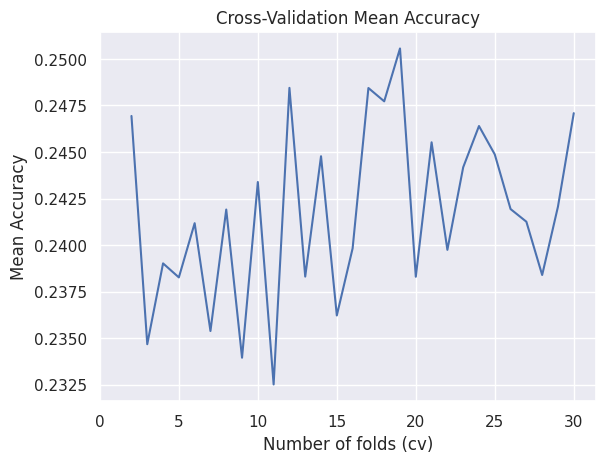

In [43]:
# ottimizzazione della cross-validation usando il dataframe dove abbiamo applicato la pca
list_cv2 = range(2,31) # questo esperimento è stato condotto con 30, 100, 300 fold che sono stati documentati
evaluate_classifiers_with_plot(list_cv2, classifier_model, X_pca, y_pca)

Anche in questo caso gli esperimento non sono andati a buon fine e vediamo come tendendo a lanciare il Gaussian Naive Bayes con dicersi valori K per i fold i massimi si raggiungono tra 17-25 su tutti i plot effettuati con iterazione da 2 a 30, 100 e 300 fold notiamo che il GB ho meno varianza rispetto al decision tree il quale oscillava tra valori di accurancy bassi fino al 18% e poteva arrivare anche olre il 30% qui il GB oscilla in un intervallo più stretto tra 22% e 26% tuttavia il 26% viene raggiunto pochissime volte negli esperimenti fatti per tali ragioni ad oggi sembra che il decision tree nonostante abbia più varianza si compori meglio.